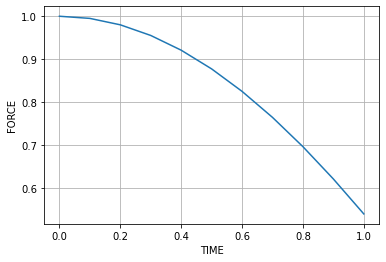

In [9]:
import numpy as np
from scipy.integrate import odeint
import math
import matplotlib.pyplot as plt
from sympy import * 
from spring_damp import spring_damp_mass

force_sin = cos
sdm_sin = spring_damp_mass(state_vec=[0,0,0], time_in_sec=1, mass=1, K=20,B=0.05, delta_mass = 20,delta_K = 5, delta_B = 20, force=force_sin)
sdm_sin.force_graph()

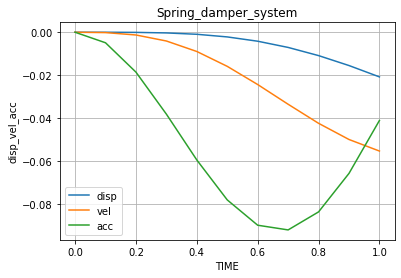

In [10]:
sdm_sin.ideal_graph()

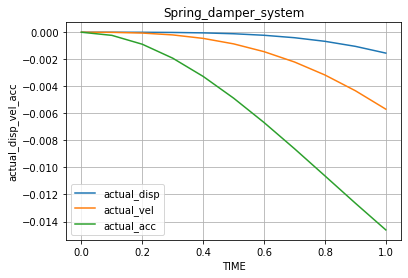

In [11]:
sdm_sin.actual_graph()

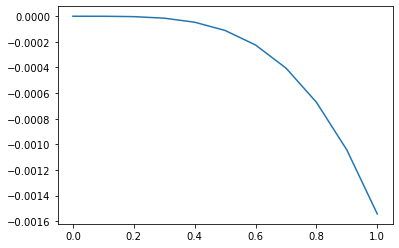

In [14]:
d = sdm_sin.actual_values_csv()
plt.plot(d['time_step'], d['actual_disp'])

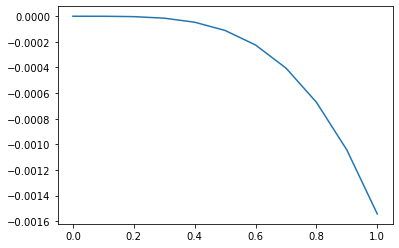

In [13]:
z = sdm_sin.actual_values()
x = np.arange(0,1.1,0.1)
y = z[:,0]
plt.plot(x, y)
